# **DataSet Analysis**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
df = pd.read_csv('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/train.csv')
display(df.head())





,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


**1. Check the number of unique essay IDs**

In [ ]:
num_unique_essays = df['essay_id'].nunique()
print(f"Number of unique essays: {num_unique_essays}")

Number of unique essays: 17307


**2. Summary statistics of text length**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
df = pd.read_csv('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/train.csv')

df['text_length'] = df['full_text'].astype(str).apply(lambda x: len(x.split()))

def highlight_rows(row):
    if row.name % 2 == 0:
        return ['background-color: white'] * len(row)
    else:
        return ['background-color: lightblue'] * len(row)

styled_df = df[['essay_id', 'text_length', 'score']].head(15).style.apply(highlight_rows, axis=1)
display(styled_df)

styled_stats = df['text_length'].describe().to_frame().style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'black'), ('color', 'white')]}]
).applymap(lambda x: 'background-color:lightgreen')

print("\nText Length Statistics:")
display(styled_stats)


,essay_id,text_length,score
0,000d118,498,3
1,000fe60,332,3
2,001ab80,550,4
3,001bdc0,451,4
4,002ba53,373,3
5,0030e86,400,4
6,0033037,179,2
7,0033bf4,353,3
8,0036253,310,2
9,0040e27,280,3



Text Length Statistics:


<ipython-input-12-2982337e3eda>:26: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  ).applymap(lambda x: 'background-color:lightgreen')


,text_length
count,17307.000000
mean,368.348241
std,150.394776
min,150.000000
25%,253.000000
50%,345.000000
75%,452.000000
max,1656.000000


**3. Plot a bar chart of score distribution**

<ipython-input-14-81e4818b85d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['score'], palette='viridis')


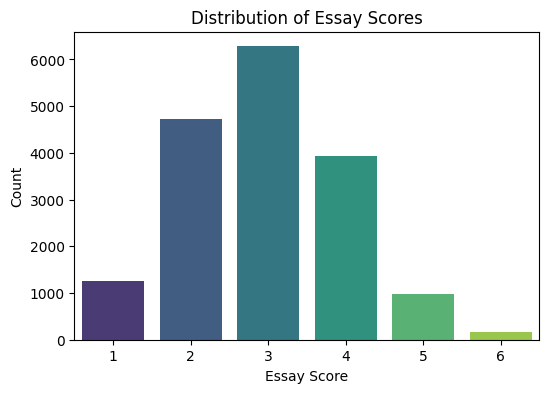

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df['score'], palette='viridis')
plt.xlabel("Essay Score")
plt.ylabel("Count")
plt.title("Distribution of Essay Scores")
plt.show()


#**Models Usage**

**LinearRegression**


**XGBRegreesor**

**LSTM**

**LGBM**

**BERT**

#**M1. Linear Regression**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import cohen_kappa_score
import numpy as np
from google.colab import drive
import joblib

# Mount Google Drive
drive.mount('/content/drive')

# Load your train.csv data
df = pd.read_csv('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/train.csv')

# Download NLTK resource (if not already downloaded)
nltk.download('stopwords')

# Define function for text preprocessing
def preprocess_text(text):
    # Remove non-alphanumeric characters and extra spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization using NLTK
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into string
    preprocessed_text = ' '.join(filtered_tokens)

    return preprocessed_text

# Apply preprocessing function to 'full_text' column
df['clean_text'] = df['full_text'].apply(preprocess_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the cleaned text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

# Split data into training and validation sets (80-20 split)
X_train, X_valid, y_train, y_valid = train_test_split(tfidf_matrix, df['score'], test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_valid)

# Clip predictions to range [1, 5] as scores are typically in this range
y_pred = np.clip(y_pred, 1, 5)

# Calculate quadratic weighted kappa
kappa = cohen_kappa_score(y_valid.round().astype(int), y_pred.round().astype(int), weights='quadratic')

print(f"Quadratic Weighted Kappa (Kappa): {kappa}")

# Save the model to Google Drive as HDF5 file
model_filename = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/model.h5'
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Quadratic Weighted Kappa (Kappa): 0.6537444455043804
Model saved as /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/model.h5


In [ ]:
import pandas as pd
import joblib
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load test data
test_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/test.csv'
df_test = pd.read_csv(test_path)

# Load the saved model and vectorizer
model = joblib.load('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/essaymodel.h5')
tfidf_vectorizer = joblib.load('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/tfidf_vectorizer.joblib')

# Define function for text preprocessing
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing function to 'full_text' column
df_test['clean_text'] = df_test['full_text'].apply(preprocess_text)

# Transform the cleaned text using the loaded TF-IDF vectorizer
tfidf_matrix_test = tfidf_vectorizer.transform(df_test['clean_text'])

# Predict on the test dataset
test_predictions = model.predict(tfidf_matrix_test)
test_predictions = np.clip(test_predictions, 1, 6)  # Clip predictions to range [1, 6]

# Prepare the submission file
submission = pd.DataFrame({
    'essay_id': df_test['essay_id'],
    'score': test_predictions.round().astype(int)
})

# Save the submission file
submission_filename = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submission.csv'
submission.to_csv(submission_filename, index=False)
print(f"Submission file saved as {submission_filename}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Submission file saved as /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submission.csv


#**M2. XGB Regressor**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, cohen_kappa_score
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load training data
train_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/train.csv'
df_train = pd.read_csv(train_path)

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing to 'full_text' column
df_train['clean_text'] = df_train['full_text'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df_train['clean_text'])
y = df_train['score']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.clip(y_valid_pred, 1, 6)  # Clip predictions to range [1, 6]

# Calculate evaluation metrics
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
valid_kappa = cohen_kappa_score(y_valid.round().astype(int), y_valid_pred.round().astype(int), weights='quadratic')

print(f"Validation RMSE: {valid_rmse}")
print(f"Validation Quadratic Weighted Kappa (Kappa): {valid_kappa}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Validation RMSE: 0.6817568834285783
Validation Quadratic Weighted Kappa (Kappa): 0.7120387905786805


In [ ]:
import pandas as pd
import joblib
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load test data
test_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/test.csv'
df_test = pd.read_csv(test_path)

# Load the saved model and vectorizer
model = joblib.load('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/essaymodel.h5')
tfidf_vectorizer = joblib.load('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/tfidf_vectorizer.joblib')

# Define function for text preprocessing
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing function to 'full_text' column
df_test['clean_text'] = df_test['full_text'].apply(preprocess_text)

# Transform the cleaned text using the loaded TF-IDF vectorizer
tfidf_matrix_test = tfidf_vectorizer.transform(df_test['clean_text'])

# Predict on the test dataset
test_predictions = model.predict(tfidf_matrix_test)
test_predictions = np.clip(test_predictions, 1, 6)  # Clip predictions to range [1, 6]

# Prepare the submission file
submission = pd.DataFrame({
    'essay_id': df_test['essay_id'],
    'score': test_predictions.round().astype(int)
})

# Save the submission file
submission_filename = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submission2.csv'
submission.to_csv(submission_filename, index=False)
print(f"Submission file saved as {submission_filename}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Submission file saved as /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submission2.csv


#**M3.NN**

In [ ]:
!pip install torch torchtext transformers


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, cohen_kappa_score, accuracy_score
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader

# Assuming preprocess_text function and train.csv loading are defined as before
# Replace with your actual implementations if different
class EssayDataset(Dataset):
    def __init__(self, texts, scores, tokenizer, max_len):
        self.texts = texts
        self.scores = scores
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        score = float(self.scores[idx])

        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        input_ids = inputs['input_ids'].squeeze(0)
        attention_mask = inputs['attention_mask'].squeeze(0)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'score': torch.tensor(score, dtype=torch.float)
        }
class CNNTextClassifier(nn.Module):
    def __init__(self, embedding_dim, num_filters, filter_sizes, output_dim, dropout):
        super(CNNTextClassifier, self).__init__()

        self.embedding = nn.Embedding(len(tokenizer), embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embedding_dim))
            for fs in filter_sizes
        ])
        self.fc = nn.Linear(num_filters * len(filter_sizes), output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, attention_mask):
        embedded = self.embedding(input_ids)
        embedded = embedded.unsqueeze(1)  # add channel dimension (batch_size, channels, seq_len, embed_dim)

        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]  # convolution over embedding
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]  # max-pooling over time
        cat = self.dropout(torch.cat(pooled, dim=1))  # concatenate pooled layers

        return self.fc(cat)
# Hyperparameters
MAX_LEN = 512
EMBEDDING_DIM = 100
NUM_FILTERS = 100
FILTER_SIZES = [3, 4, 5]
OUTPUT_DIM = 1
DROPOUT = 0.5
LEARNING_RATE = 0.001
BATCH_SIZE = 8
NUM_EPOCHS = 5

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Data preparation
train_dataset = EssayDataset(df_train['clean_text'].tolist(), df_train['score'].tolist(), tokenizer, MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Model initialization
model = CNNTextClassifier(EMBEDDING_DIM, NUM_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT)

# Optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()

# Training loop
model.train()
for epoch in range(NUM_EPOCHS):
    epoch_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        scores = batch['score']

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs.squeeze(1), scores)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {epoch_loss / len(train_loader)}')

# Evaluation
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in train_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        scores = batch['score']

        outputs = model(input_ids, attention_mask)
        predictions.extend(outputs.squeeze(1).tolist())
        true_labels.extend(scores.tolist())

predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(true_labels, predictions))
kappa = cohen_kappa_score(true_labels.round().astype(int), predictions.round().astype(int), weights='quadratic')
accuracy = accuracy_score(true_labels.round().astype(int), predictions.round().astype(int))

print(f"RMSE: {rmse}")
print(f"Quadratic Weighted Kappa (Kappa): {kappa}")
print(f"Accuracy: {accuracy}")

# Save model
torch.save(model.state_dict(), '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/cnn_model.pt')

Epoch 1/5, Loss: 0.946622303594076
Epoch 2/5, Loss: 0.6983935279623638
Epoch 3/5, Loss: 0.6179481594687304
Epoch 4/5, Loss: 0.5646644185250711
Epoch 5/5, Loss: 0.5179007470921068
RMSE: 0.5831318874974849
Quadratic Weighted Kappa (Kappa): 0.7821262219124349
Accuracy: 0.6270873057144508


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, cohen_kappa_score, accuracy_score

# Define EssayDataset class
class EssayDataset(Dataset):
    def __init__(self, texts, scores, tokenizer, max_len):
        self.texts = texts
        self.scores = scores  # Dummy scores for test set
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])

        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        input_ids = inputs['input_ids'].squeeze(0)
        attention_mask = inputs['attention_mask'].squeeze(0)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask
        }

# Define CNNTextClassifier class
class CNNTextClassifier(nn.Module):
    def __init__(self, embedding_dim, num_filters, filter_sizes, output_dim, dropout, vocab_size):
        super(CNNTextClassifier, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embedding_dim))
            for fs in filter_sizes
        ])
        self.fc = nn.Linear(num_filters * len(filter_sizes), output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, attention_mask):
        embedded = self.embedding(input_ids)
        embedded = embedded.unsqueeze(1)  # add channel dimension (batch_size, channels, seq_len, embed_dim)

        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]  # convolution over embedding
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]  # max-pooling over time
        cat = self.dropout(torch.cat(pooled, dim=1))  # concatenate pooled layers

        return self.fc(cat)

# Hyperparameters
MAX_LEN = 512
EMBEDDING_DIM = 100
NUM_FILTERS = 100
FILTER_SIZES = [3, 4, 5]
OUTPUT_DIM = 1
DROPOUT = 0.5

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load test data
test_df = pd.read_csv('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/test.csv')
test_df['clean_text'] = test_df['full_text'].astype(str)  # Assuming 'full_text' is already cleaned if needed

# Create test dataset and data loader
test_dataset = EssayDataset(test_df['clean_text'].tolist(),
                            [0]*len(test_df),  # Dummy scores since we predict these
                            tokenizer,
                            MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Initialize model
model = CNNTextClassifier(EMBEDDING_DIM, NUM_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, len(tokenizer))

# Load trained model state dict
model.load_state_dict(torch.load('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/cnn_model.pt'))

# Evaluation mode
model.eval()

# Predictions storage
predictions = []

# Make predictions
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']

        outputs = model(input_ids, attention_mask)
        predictions.extend(outputs.squeeze(1).tolist())

# Convert predictions to numpy array
predictions = np.array(predictions)

# Prepare submission DataFrame
submission_df = pd.DataFrame({
    'essay_id': test_df['essay_id'],
    'score': predictions
})

# Save submission file
submission_df.to_csv('submission.csv', index=False)

print("Predictions saved successfully to submission.csv.")

Predictions saved successfully to submission.csv.


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, cohen_kappa_score, accuracy_score

# Define EssayDataset class
class EssayDataset(Dataset):
    def __init__(self, texts, scores, tokenizer, max_len):
        self.texts = texts
        self.scores = scores  # Dummy scores for test set
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])

        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        input_ids = inputs['input_ids'].squeeze(0)
        attention_mask = inputs['attention_mask'].squeeze(0)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask
        }

# Define CNNTextClassifier class
class CNNTextClassifier(nn.Module):
    def __init__(self, embedding_dim, num_filters, filter_sizes, output_dim, dropout, vocab_size):
        super(CNNTextClassifier, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embedding_dim))
            for fs in filter_sizes
        ])
        self.fc = nn.Linear(num_filters * len(filter_sizes), output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, attention_mask):
        embedded = self.embedding(input_ids)
        embedded = embedded.unsqueeze(1)  # add channel dimension (batch_size, channels, seq_len, embed_dim)

        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]  # convolution over embedding
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]  # max-pooling over time
        cat = self.dropout(torch.cat(pooled, dim=1))  # concatenate pooled layers

        return self.fc(cat)

# Hyperparameters
MAX_LEN = 512
EMBEDDING_DIM = 100
NUM_FILTERS = 100
FILTER_SIZES = [3, 4, 5]
OUTPUT_DIM = 1
DROPOUT = 0.5

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load test data
test_df = pd.read_csv('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/test.csv')
test_df['clean_text'] = test_df['full_text'].astype(str)  # Assuming 'full_text' is already cleaned if needed

# Create test dataset and data loader
test_dataset = EssayDataset(test_df['clean_text'].tolist(),
                            [0]*len(test_df),  # Dummy scores since we predict these
                            tokenizer,
                            MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Initialize model
model = CNNTextClassifier(EMBEDDING_DIM, NUM_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, len(tokenizer))

# Load trained model state dict
model.load_state_dict(torch.load('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/cnn_model.pt'))

# Evaluation mode
model.eval()

# Predictions storage
predictions = []

# Make predictions
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']

        outputs = model(input_ids, attention_mask)
        predictions.extend(outputs.squeeze(1).tolist())

# Convert predictions to numpy array
predictions = np.array(predictions)

# Prepare submission DataFrame
submission_df = pd.DataFrame({
    'essay_id': test_df['essay_id'],
    'score': predictions
})

# Save submission file to specified path
submission_df.to_csv('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submission4.csv', index=False)

print("Predictions saved successfully to submission2.csv.")


Predictions saved successfully to submission2.csv.


#**M4 LGBM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, cohen_kappa_score
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import joblib

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load training data
train_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/train.csv'
df_train = pd.read_csv(train_path)

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing to 'full_text' column
df_train['clean_text'] = df_train['full_text'].apply(preprocess_text)

# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df_train['clean_text'])
y = df_train['score']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LightGBM model
model = LGBMRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.clip(y_valid_pred, 1, 6)  # Clip predictions to range [1, 6]

# Calculate evaluation metrics
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
valid_kappa = cohen_kappa_score(y_valid.round().astype(int), y_valid_pred.round().astype(int), weights='quadratic')

print(f"Validation RMSE: {valid_rmse}")
print(f"Validation Quadratic Weighted Kappa (Kappa): {valid_kappa}")

# Save the model
model_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/AutomatedEssaymodel_LightGBM.h5'
joblib.dump(model, model_save_path)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210644
[LightGBM] [Info] Number of data points in the train set: 13845, number of used features: 1000
[LightGBM] [Info] Start training from score 2.953702
Validation RMSE: 0.6497080013551857
Validation Quadratic Weighted Kappa (Kappa): 0.725457247984968


['/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/AutomatedEssaymodel_LightGBM.h5']

In [ ]:
import pandas as pd
import joblib
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load test data
test_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/test.csv'
df_test = pd.read_csv(test_path)

# Load the saved model and vectorizer
model = joblib.load('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/AutomatedEssaymodel_LightGBM.h5')
tfidf_vectorizer = joblib.load('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/tfidf_vectorizer.joblib')

# Define function for text preprocessing
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing function to 'full_text' column
df_test['clean_text'] = df_test['full_text'].apply(preprocess_text)

# Transform the cleaned text using the loaded TF-IDF vectorizer
tfidf_matrix_test = tfidf_vectorizer.transform(df_test['clean_text'])

# Predict on the test dataset
test_predictions = model.predict(tfidf_matrix_test)
test_predictions = np.clip(test_predictions, 1, 6)  # Clip predictions to range [1, 6]

# Prepare the submission file
submission = pd.DataFrame({
    'essay_id': df_test['essay_id'],
    'score': test_predictions.round().astype(int)
})

# Save the submission file
submission_filename = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submission_lightgbm.csv'
submission.to_csv(submission_filename, index=False)
print(f"Submission file saved as {submission_filename}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Submission file saved as /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submission_lightgbm.csv


#**M2. imporved XGBR**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, cohen_kappa_score
import joblib

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load training data
train_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/train.csv'
df_train = pd.read_csv(train_path)

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing to 'full_text' column
df_train['clean_text'] = df_train['full_text'].apply(preprocess_text)

# Add additional features
df_train['text_length'] = df_train['full_text'].apply(len)
df_train['word_count'] = df_train['full_text'].apply(lambda x: len(x.split()))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df_train['clean_text'])

# Combine TF-IDF features with additional features
X = np.hstack((X_tfidf.toarray(), df_train[['text_length', 'word_count']].values))
y = df_train['score']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Setup the random search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_xgb_model = XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred = best_xgb_model.predict(X_valid)
y_valid_pred = np.clip(y_valid_pred, 1, 6)

# Calculate evaluation metrics
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
valid_kappa = cohen_kappa_score(y_valid.round().astype(int), y_valid_pred.round().astype(int), weights='quadratic')

print(f"Validation RMSE: {valid_rmse}")
print(f"Validation Quadratic Weighted Kappa: {valid_kappa}")

# Save the model to a file
model_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/Model.h5'
joblib.dump(best_xgb_model, model_save_path)
print(f"Model saved to {model_save_path}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Validation RMSE: 0.6114738808268803
Validation Quadratic Weighted Kappa: 0.7665171631265701
Model saved to /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/Model.h5


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBRegressor
import joblib

# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

# Load test data
test_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/test.csv'
df_test = pd.read_csv(test_path)

# Text preprocessing function (same as used for training data)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing to 'full_text' column in test data
df_test['clean_text'] = df_test['full_text'].apply(preprocess_text)

# Load the trained TF-IDF vectorizer
vectorizer_load_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/tfidf_vectorizer.pkl'
tfidf_vectorizer = joblib.load(vectorizer_load_path)

# TF-IDF Vectorization on test data
X_tfidf_test = tfidf_vectorizer.transform(df_test['clean_text'])

# Additional features for test data
df_test['text_length'] = df_test['full_text'].apply(len)
df_test['word_count'] = df_test['full_text'].apply(lambda x: len(x.split()))

# Combine TF-IDF features with additional features
X_test = np.hstack((X_tfidf_test.toarray(), df_test[['text_length', 'word_count']].values))

# Load the trained XGBoost model
model_load_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/Model.h5'
best_xgb_model = joblib.load(model_load_path)

# Predict on the test set
y_test_pred = best_xgb_model.predict(X_test)
y_test_pred = np.clip(y_test_pred, 1, 6)  # Clip predictions to the range [1, 6]

# Prepare submission DataFrame
submission_df = pd.DataFrame({'essay_id': df_test['essay_id'], 'predicted_score': y_test_pred})

# Save submission to CSV file
submission_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submissions.csv'
submission_df.to_csv(submission_save_path, index=False)
print(f"Submission saved to {submission_save_path}")


Submission saved to /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submissions.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**M5. LSTM model**

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, cohen_kappa_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load training data
train_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/train.csv'
df_train = pd.read_csv(train_path)

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing to 'full_text' column
df_train['clean_text'] = df_train['full_text'].apply(preprocess_text)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(df_train['clean_text'].values)
X = tokenizer.texts_to_sequences(df_train['clean_text'].values)
X = pad_sequences(X, maxlen=300)

# Save the tokenizer
tokenizer_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/tokenizer.pkl'
joblib.dump(tokenizer, tokenizer_save_path)

# Additional features
df_train['text_length'] = df_train['full_text'].apply(len)
df_train['word_count'] = df_train['full_text'].apply(lambda x: len(x.split()))

# Labels
y = df_train['score'].values

# Split data into training and validation sets
X_train_text, X_valid_text, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_additional, X_valid_additional = train_test_split(df_train[['text_length', 'word_count']].values, test_size=0.2, random_state=42)

# Building the LSTM model with additional features
embedding_dim = 100

# Text input branch
text_input = Input(shape=(300,), name='text_input')
x = Embedding(input_dim=5000, output_dim=embedding_dim, input_length=300)(text_input)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2))(x)

# Additional features input branch
additional_input = Input(shape=(2,), name='additional_input')
y = Dense(10, activation='relu')(additional_input)

# Concatenate the two branches
combined = Concatenate()([x, y])
combined = Dense(50, activation='relu')(combined)
combined = Dropout(0.2)(combined)
output = Dense(1, activation='linear')(combined)

model = Model(inputs=[text_input, additional_input], outputs=output)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
print(model.summary())

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = model.fit([X_train_text, X_train_additional], y_train, epochs=20, batch_size=64, validation_data=([X_valid_text, X_valid_additional], y_valid), callbacks=[early_stopping], verbose=1)

# Predict on the validation set
y_valid_pred = model.predict([X_valid_text, X_valid_additional])
y_valid_pred = np.clip(y_valid_pred, 1, 6).flatten()

# Calculate evaluation metrics
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
valid_kappa = cohen_kappa_score(y_valid.round().astype(int), y_valid_pred.round().astype(int), weights='quadratic')

print(f"Validation RMSE: {valid_rmse}")
print(f"Validation Quadratic Weighted Kappa: {valid_kappa}")

# Save the model to a file
model_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/LSTM_Model.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import joblib

# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

# Function for text preprocessing (same as used in training)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Load test data
test_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/test.csv'
df_test = pd.read_csv(test_path)

# Apply preprocessing to 'full_text' column in test data
df_test['clean_text'] = df_test['full_text'].apply(preprocess_text)

# Load the trained tokenizer
tokenizer_load_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/tokenizer.pkl'
tokenizer = joblib.load(tokenizer_load_path)

# Tokenization and padding for test data
X_test = tokenizer.texts_to_sequences(df_test['clean_text'].values)
X_test = pad_sequences(X_test, maxlen=300)

# Load the trained LSTM model
model_load_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/LSTM_Model.h5'
model = load_model(model_load_path)

# Additional features for test data
df_test['text_length'] = df_test['full_text'].apply(len)
df_test['word_count'] = df_test['full_text'].apply(lambda x: len(x.split()))
X_test_additional = df_test[['text_length', 'word_count']].values

# Predict on the test set
y_test_pred = model.predict([X_test, X_test_additional])
y_test_pred = np.clip(y_test_pred, 1, 6).flatten()
y_test_pred = np.round(y_test_pred).astype(int)  # Round predictions and convert to integers

# Prepare submission DataFrame
submission_df = pd.DataFrame({'essay_id': df_test['essay_id'], 'predicted_score': y_test_pred})

# Save submission to CSV file
submission_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submission100.csv'
submission_df.to_csv(submission_save_path, index=False)
print(f"Submission saved to {submission_save_path}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1/1 [==============================] - 1s 1s/step
Submission saved to /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submission100.csv


In [ ]:
!pip install pyspellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 16.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBRegressor
import joblib
from spellchecker import SpellChecker  # Ensure you have installed 'pyspellchecker' package

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Spell checker setup
spell = SpellChecker()

# Text preprocessing function with spell checking
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()

    # Spell checking
    tokens = word_tokenize(text)
    corrected_tokens = [spell.correction(word) for word in tokens]

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in corrected_tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Load test data
test_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/test.csv'
df_test = pd.read_csv(test_path)

# Apply preprocessing to 'full_text' column in test data
df_test['clean_text'] = df_test['full_text'].apply(preprocess_text)

# Load TF-IDF vectorizer
vectorizer_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/Tfidf_Vectorizer.joblib'
tfidf_vectorizer = joblib.load(vectorizer_path)

# Transform test data using TF-IDF vectorizer
X_tfidf_test = tfidf_vectorizer.transform(df_test['clean_text'])

# Additional features for test data
df_test['text_length'] = df_test['full_text'].apply(len)
df_test['word_count'] = df_test['full_text'].apply(lambda x: len(x.split()))

# Combine TF-IDF features and additional features
X_test_features = np.hstack((X_tfidf_test.toarray(), df_test[['text_length', 'word_count']].values))

# Load the trained XGBoost model
model_load_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/XGBModel.h5'
xgb_model = joblib.load(model_load_path)

# Predict on the test set
y_test_pred = xgb_model.predict(X_test_features)
y_test_pred = np.clip(y_test_pred, 1, 6)  # Clip predictions to the range [1, 6]

# Prepare submission DataFrame
submission_df = pd.DataFrame({'essay_id': df_test['essay_id'], 'predicted_score': y_test_pred})

# Save submission to CSV file
submission_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submissions_xgb.csv'
submission_df.to_csv(submission_save_path, index=False)
print(f"Submission saved to {submission_save_path}")



#**M2 imporved XGBR**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, cohen_kappa_score
import joblib

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load training data
train_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/train.csv'
df_train = pd.read_csv(train_path)

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing to 'full_text' column
df_train['clean_text'] = df_train['full_text'].apply(preprocess_text)

# Add additional features (excluding avg_sentence_length and flesch_reading_ease)
df_train['text_length'] = df_train['full_text'].apply(len)
df_train['word_count'] = df_train['full_text'].apply(lambda x: len(x.split()))
df_train['avg_word_length'] = df_train['full_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df_train['sentence_count'] = df_train['full_text'].apply(lambda x: len(re.split(r'[.!?]', x)))

# TF-IDF Vectorization with bi-grams and reduced max_features
tfidf_vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(df_train['clean_text'])

# Save the TF-IDF vectorizer
vectorizer_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/xgbrtfidf_vectorizer.joblib'
joblib.dump(tfidf_vectorizer, vectorizer_save_path)

# Combine TF-IDF features with selected additional features
X = np.hstack((X_tfidf.toarray(), df_train[['text_length', 'word_count', 'avg_word_length', 'sentence_count']].values))
y = df_train['score']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Setup the random search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_xgb_model = XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred = best_xgb_model.predict(X_valid)
y_valid_pred = np.clip(y_valid_pred, 1, 6)

# Calculate evaluation metrics
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
valid_kappa = cohen_kappa_score(y_valid.round().astype(int), y_valid_pred.round().astype(int), weights='quadratic')

print(f"Validation RMSE: {valid_rmse}")
print(f"Validation Quadratic Weighted Kappa: {valid_kappa}")

# Save the model to a file
model_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/XGBR-Model.h5'
joblib.dump(best_xgb_model, model_save_path)
print(f"Model saved to {model_save_path}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Validation RMSE: 0.6100873455112498
Validation Quadratic Weighted Kappa: 0.7711302104617234
Model saved to /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/XGBR-Model.h5


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from lightgbm import LGBMRegressor  # Import LightGBM

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load test data
test_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/test.csv'
df_test = pd.read_csv(test_path)

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing to 'full_text' column in test data
df_test['clean_text'] = df_test['full_text'].apply(preprocess_text)

# Load TF-IDF vectorizer
vectorizer_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/xgbrtfidf_vectorizer.joblib'
tfidf_vectorizer = joblib.load(vectorizer_path)

# Transform test data using TF-IDF vectorizer
X_tfidf_test = tfidf_vectorizer.transform(df_test['clean_text'])

# Additional features for test data
df_test['text_length'] = df_test['full_text'].apply(len)
df_test['word_count'] = df_test['full_text'].apply(lambda x: len(x.split()))
df_test['avg_word_length'] = df_test['full_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df_test['sentence_count'] = df_test['full_text'].apply(lambda x: len(re.split(r'[.!?]', x)))

# Combine TF-IDF features with selected additional features
X_test_features = np.hstack((X_tfidf_test.toarray(), df_test[['text_length', 'word_count', 'avg_word_length', 'sentence_count']].values))

# Load the trained LightGBM model
model_load_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/XGBR-Model.h5'
lgbm_model = joblib.load(model_load_path)

# Predict on the test set
y_test_pred = lgbm_model.predict(X_test_features)
y_test_pred = np.round(y_test_pred).astype(int)  # Round predictions to nearest integer
y_test_pred = np.clip(y_test_pred, 1, 6)  # Clip predictions to the range [1, 6]

# Prepare submission DataFrame
submission_df = pd.DataFrame({'essay_id': df_test['essay_id'], 'predicted_score': y_test_pred})

# Save submission to CSV file
submission_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submission_xgbrfeturd.csv'
submission_df.to_csv(submission_save_path, index=False)
print(f"Submission saved to {submission_save_path}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Submission saved to /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submission_xgbrfeturd.csv


**xgbr with some new faetures**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from textblob import TextBlob

# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

# Load test data
test_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/test.csv'
df_test = pd.read_csv(test_path)

# Text preprocessing function (same as used for training data)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing to 'full_text' column in test data
df_test['clean_text'] = df_test['full_text'].apply(preprocess_text)

# Load the trained TF-IDF vectorizer
vectorizer_load_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/xgbrlineartfidf_vectorizer.joblib'
tfidf_vectorizer = joblib.load(vectorizer_load_path)

# TF-IDF Vectorization on test data
X_tfidf_test = tfidf_vectorizer.transform(df_test['clean_text'])

# Additional features for test data
df_test['text_length'] = df_test['full_text'].apply(len)
df_test['word_count'] = df_test['full_text'].apply(lambda x: len(x.split()))
df_test['avg_word_length'] = df_test['full_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df_test['sentiment'] = df_test['full_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Combine TF-IDF features with additional features
X_test = np.hstack((X_tfidf_test.toarray(), df_test[['text_length', 'word_count', 'avg_word_length', 'sentiment']].values))

# Load the trained XGBoost model
model_load_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/xgbrlinearModel.h5'
best_ensemble_model = joblib.load(model_load_path)

# Predict on the test set
y_test_pred = best_ensemble_model.predict(X_test)
y_test_pred_rounded = np.round(y_test_pred).astype(int)  # Round predictions to nearest integer
y_test_pred_clipped = np.clip(y_test_pred_rounded, 1, 6)  # Clip predictions to the range [1, 6]

# Prepare submission DataFrame
submission_df = pd.DataFrame({'essay_id': df_test['essay_id'], 'predicted_score': y_test_pred_clipped})

# Save submission to CSV file
submission_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/xgbrlinearsubmissions.csv'
submission_df.to_csv(submission_save_path, index=False)
print(f"Submission saved to {submission_save_path}")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Submission saved to /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/xgbrlinearsubmissions.csv


#**M2 imporved xgbr**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, cohen_kappa_score
import joblib
from scipy.stats import kurtosis

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Function to remove HTML tags
def removeHTML(x):
    html = re.compile(r'<.*?>')
    return html.sub(r'', x)

# Function for comprehensive data preprocessing
def dataPreprocessing(x):
    x = x.lower()
    x = removeHTML(x)
    x = re.sub("@\w+", '', x)
    x = re.sub("http\w+", '', x)
    x = re.sub(r"\s+", " ", x)
    x = re.sub(r"\.+", ".", x)
    x = re.sub(r"\,+", ",", x)
    x = x.strip()
    return x

# Function to remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Function to count spelling errors
def count_spelling_errors(text):
    # Implement your own logic or use a library like spaCy to count spelling errors
    return 0  # Placeholder

# Function to preprocess words
def Word_Preprocess(tmp):
    tmp['clean_text'] = tmp['full_text'].apply(dataPreprocessing)
    words = tmp[['essay_id', 'clean_text']].copy()
    words = words.assign(word=words['clean_text'].str.split()).explode('word').reset_index(drop=True)
    words['word_len'] = words['word'].apply(len)
    words = words[words['word_len'] > 0]  # Remove words with length 0
    return words

# Function for word feature engineering
def Word_Eng(words):
    word_aggs = {
        'word_len': ['max', 'mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.50), lambda x: x.quantile(0.75)]
    }
    essay_features = words.groupby('essay_id').agg(word_aggs)
    essay_features.columns = ['_'.join(col).strip() for col in essay_features.columns.values]
    return essay_features.reset_index()

# Function to preprocess sentences
def Sentence_Preprocess(tmp):
    tmp['clean_text'] = tmp['full_text'].apply(dataPreprocessing)
    sentences = tmp[['essay_id', 'clean_text']].copy()
    sentences = sentences.assign(sentence=sentences['clean_text'].str.split('.')).explode('sentence').reset_index(drop=True)
    sentences['sentence_len'] = sentences['sentence'].apply(len)
    sentences['sentence_word_cnt'] = sentences['sentence'].apply(lambda x: len(x.split()))
    sentences = sentences[sentences['sentence_len'] >= 15]  # Filter sentences with length >= 15
    return sentences

# Function for sentence feature engineering
def Sentence_Eng(sentences):
    sentence_aggs = {
        'sentence_len': ['count', 'max', 'mean', 'min', 'sum', 'first', 'last', kurtosis, lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
        'sentence_word_cnt': ['max', 'mean', 'min', 'sum', 'first', 'last', kurtosis, lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
    }
    essay_features = sentences.groupby('essay_id').agg(sentence_aggs)
    essay_features.columns = ['_'.join(col).strip() for col in essay_features.columns.values]
    return essay_features.reset_index()

# Function to preprocess paragraphs
def Paragraph_Preprocess(tmp):
    tmp = tmp.explode('paragraph')
    tmp['clean_paragraph'] = tmp['paragraph'].apply(dataPreprocessing)
    tmp['paragraph_no_punctuation'] = tmp['clean_paragraph'].apply(remove_punctuation)
    tmp['paragraph_error_num'] = tmp['paragraph_no_punctuation'].apply(count_spelling_errors)
    tmp['paragraph_len'] = tmp['paragraph'].apply(len)
    tmp['paragraph_sentence_cnt'] = tmp['paragraph'].apply(lambda x: len(re.split(r'\.|!|\?', x)))
    tmp['paragraph_word_cnt'] = tmp['paragraph'].apply(lambda x: len(x.split()))
    return tmp

# Function for paragraph feature engineering
def Paragraph_Eng(paragraphs):
    paragraph_aggs = {
        'paragraph_len': ['max', 'mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
        'paragraph_sentence_cnt': ['max', 'mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
        'paragraph_word_cnt': ['max', 'mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
        'paragraph_error_num': ['max', 'mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
    }
    essay_features = paragraphs.groupby('essay_id').agg(paragraph_aggs)
    essay_features.columns = ['_'.join(col).strip() for col in essay_features.columns.values]
    return essay_features.reset_index()

# Load training data
train_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/train.csv'
df_train = pd.read_csv(train_path)

# Apply preprocessing to 'full_text' column
df_train['clean_text'] = df_train['full_text'].apply(preprocess_text)

# Additional textual features
df_train['num_chars'] = df_train['full_text'].apply(len)
df_train['num_words'] = df_train['full_text'].apply(lambda x: len(x.split()))
df_train['num_sentences'] = df_train['full_text'].apply(lambda x: len(sent_tokenize(x)))
df_train['AvgWordLength'] = df_train['num_chars'] / df_train['num_words']

# Word features
words_df = Word_Preprocess(df_train)
word_features = Word_Eng(words_df)
df_train = df_train.merge(word_features, on='essay_id', how='left')

# Sentence features
sentences_df = Sentence_Preprocess(df_train)
sentence_features = Sentence_Eng(sentences_df)
df_train = df_train.merge(sentence_features, on='essay_id', how='left')

# Paragraph features
df_train['paragraph'] = df_train['full_text'].str.split('\n')
paragraphs_df = Paragraph_Preprocess(df_train)
paragraph_features = Paragraph_Eng(paragraphs_df)
df_train = df_train.merge(paragraph_features, on='essay_id', how='left')

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df_train['clean_text'])

# Combine TF-IDF features with additional features
X = np.hstack((X_tfidf.toarray(), df_train[['num_chars', 'num_words', 'num_sentences', 'AvgWordLength']].values))
y = df_train['score']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Setup the random search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_xgb_model = XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred = best_xgb_model.predict(X_valid)
y_valid_pred = np.clip(y_valid_pred, 1, 6)  # Assuming scores range from 1 to 6

# Calculate evaluation metrics
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
valid_kappa = cohen_kappa_score(y_valid.round().astype(int), y_valid_pred.round().astype(int), weights='quadratic')

print(f"Validation RMSE: {valid_rmse}")
print(f"Validation Quadratic Weighted Kappa: {valid_kappa}")

# Save the model to a file
model_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/EssayModel.h5'
joblib.dump(best_xgb_model, model_save_path)
print(f"Model saved to {model_save_path}")

# Save the TF-IDF vectorizer
vectorizer_save_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/Essaytfidf_vectorizer.joblib'
joblib.dump(tfidf_vectorizer, vectorizer_save_path)
print(f"TF-IDF Vectorizer saved to {vectorizer_save_path}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Validation RMSE: 0.5980248191534405
Validation Quadratic Weighted Kappa: 0.7799444202195857
Model saved to /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/EssayModel.h5
TF-IDF Vectorizer saved to /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/Essaytfidf_vectorizer.joblib


# **M6.deberta**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from gensim.models import Word2Vec
from transformers import AutoTokenizer, DebertaForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding
from datasets import Dataset

# Define path to your train.csv file
train_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/train.csv'

# Load data
df_train = pd.read_csv(train_path)

# Adjust labels to start from 0 (assuming score ranges from 1 to 6)
df_train['labels'] = df_train['score'] - 1

# Initialize and train Word2Vec model
word2vec_model = Word2Vec(sentences=df_train['full_text'].apply(str.split).tolist(), vector_size=100, window=5, min_count=1, workers=4)

# Function to embed text using Word2Vec model
def embed_text(text):
    embedded_text = []
    for word in text.split():
        if word in word2vec_model.wv:
            embedded_text.append(word2vec_model.wv[word])
        else:
            embedded_text.append(np.zeros(word2vec_model.vector_size))  # Handle out-of-vocabulary words
    return np.mean(embedded_text, axis=0)  # Average embeddings of words in the text

# Tokenizer for the input text
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-base')

def tokenize(batch):
    return tokenizer(batch['full_text'], padding=True, truncation=True)

# Prepare datasets
ds_train = Dataset.from_pandas(df_train)

# Embedding datasets with Word2Vec embeddings
ds_train = ds_train.map(lambda x: {'embeddings': embed_text(x['full_text'])}, batched=True)

# Define training and validation sets
train_dataset, val_dataset = train_test_split(ds_train, test_size=0.1, random_state=42)

# Define training arguments
train_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    logging_strategy='epoch',
    save_strategy='epoch',
    per_device_train_batch_size=4,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    warmup_ratio=0.1,
    lr_scheduler_type='linear',
    gradient_accumulation_steps=4,
    report_to='none',
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False,
)

# Define model
model = DebertaForSequenceClassification.from_pretrained('microsoft/deberta-v3-base', num_labels=6)

# Define compute metrics function (for evaluation)
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    kappa = cohen_kappa_score(labels, preds, weights='quadratic')
    return {'cohen_kappa': kappa}

# Create Trainer instance
trainer = Trainer(
    model=model,
    args=train_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    data_collator=DataCollatorWithPadding(tokenizer),
)

# Train the model
trainer.train()

# Save the model
model.save_pretrained('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/deberta-v3-trained-model')

# Optionally, save tokenizer
tokenizer.save_pretrained('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/deberta-v3-tokenizer')


#**M5. BERT**

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, cohen_kappa_score, accuracy_score
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader

# Assuming preprocess_text function is defined
def preprocess_text(text):
    # Add your text preprocessing steps here
    return text

class EssayDataset(Dataset):
    def __init__(self, texts, scores, tokenizer, max_len):
        self.texts = texts
        self.scores = scores
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        score = float(self.scores[idx])

        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        input_ids = inputs['input_ids'].squeeze(0)
        attention_mask = inputs['attention_mask'].squeeze(0)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'score': torch.tensor(score, dtype=torch.float)
        }

class CNNTextClassifier(nn.Module):
    def __init__(self, embedding_dim, num_filters, filter_sizes, output_dim, dropout):
        super(CNNTextClassifier, self).__init__()

        self.embedding = nn.Embedding(len(tokenizer), embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embedding_dim))
            for fs in filter_sizes
        ])
        self.fc = nn.Linear(num_filters * len(filter_sizes), output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, attention_mask):
        embedded = self.embedding(input_ids)
        embedded = embedded.unsqueeze(1)  # add channel dimension (batch_size, channels, seq_len, embed_dim)

        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]  # convolution over embedding
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]  # max-pooling over time
        cat = self.dropout(torch.cat(pooled, dim=1))  # concatenate pooled layers

        return self.fc(cat)

# Hyperparameters
MAX_LEN = 512
OUTPUT_DIM = 1
BATCH_SIZE = 8
NUM_EPOCHS = 5

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/train.csv')
df['clean_text'] = df['full_text'].apply(preprocess_text)

# Split data into training and validation sets
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

# Data preparation
train_dataset = EssayDataset(df_train['clean_text'].tolist(), df_train['score'].tolist(), tokenizer, MAX_LEN)
val_dataset = EssayDataset(df_val['clean_text'].tolist(), df_val['score'].tolist(), tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Hyperparameter search space
param_grid = {
    'embedding_dim': [50, 100, 200],
    'num_filters': [50, 100, 200],
    'filter_sizes': [[2, 3, 4], [3, 4, 5], [4, 5, 6]],
    'dropout': [0.3, 0.5, 0.7],
    'learning_rate': [0.001, 0.0001, 0.00001]
}

best_rmse = float('inf')
best_params = {}

for embedding_dim in param_grid['embedding_dim']:
    for num_filters in param_grid['num_filters']:
        for filter_sizes in param_grid['filter_sizes']:
            for dropout in param_grid['dropout']:
                for learning_rate in param_grid['learning_rate']:
                    # Model initialization
                    model = CNNTextClassifier(embedding_dim, num_filters, filter_sizes, OUTPUT_DIM, dropout)
                    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
                    criterion = nn.MSELoss()

                    # Training loop
                    model.train()
                    for epoch in range(NUM_EPOCHS):
                        epoch_loss = 0
                        for batch in train_loader:
                            input_ids = batch['input_ids']
                            attention_mask = batch['attention_mask']
                            scores = batch['score']

                            optimizer.zero_grad()
                            outputs = model(input_ids, attention_mask)
                            loss = criterion(outputs.squeeze(1), scores)
                            loss.backward()
                            optimizer.step()

                            epoch_loss += loss.item()

                    # Evaluation
                    model.eval()
                    predictions = []
                    true_labels = []

                    with torch.no_grad():
                        for batch in val_loader:
                            input_ids = batch['input_ids']
                            attention_mask = batch['attention_mask']
                            scores = batch['score']

                            outputs = model(input_ids, attention_mask)
                            predictions.extend(outputs.squeeze(1).tolist())
                            true_labels.extend(scores.tolist())

                    predictions = np.array(predictions)
                    true_labels = np.array(true_labels)

                    # Compute evaluation metrics
                    rmse = np.sqrt(mean_squared_error(true_labels, predictions))

                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_params = {
                            'embedding_dim': embedding_dim,
                            'num_filters': num_filters,
                            'filter_sizes': filter_sizes,
                            'dropout': dropout,
                            'learning_rate': learning_rate
                        }

print(f"Best RMSE: {best_rmse}")
print(f"Best Parameters: {best_params}")

# Use the best hyperparameters to train the final model
model = CNNTextClassifier(
    best_params['embedding_dim'],
    best_params['num_filters'],
    best_params['filter_sizes'],
    OUTPUT_DIM,
    best_params['dropout']
)

optimizer = optim.Adam(model.parameters(), lr=best_params['learning_rate'])
criterion = nn.MSELoss()

# Training loop with the best hyperparameters
model.train()
for epoch in range(NUM_EPOCHS):
    epoch_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        scores = batch['score']

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs.squeeze(1), scores)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {epoch_loss / len(train_loader)}')

# Evaluation with the best hyperparameters
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        scores = batch['score']

        outputs = model(input_ids, attention_mask)
        predictions.extend(outputs.squeeze(1).tolist())
        true_labels.extend(scores.tolist())

predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(true_labels, predictions))
kappa = cohen_kappa_score(true_labels.round().astype(int), predictions.round().astype(int), weights='quadratic')
accuracy = accuracy_score(true_labels.round().astype(int), predictions.round().astype(int))

print(f"RMSE: {rmse}")
print(f"Quadratic Weighted Kappa (Kappa): {kappa}")
print(f"Accuracy: {accuracy}")

# Save model
torch.save(model.state_dict(), '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/nn_modelessay scoring.pt')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, cohen_kappa_score, accuracy_score
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import time
import tqdm
from torch.cuda.amp import autocast, GradScaler

# Load training data
train_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/train.csv'
df_train = pd.read_csv(train_path)

# Train-test split
train_texts, val_texts, train_scores, val_scores = train_test_split(df_train['full_text'].tolist(), df_train['score'].tolist(), test_size=0.2, random_state=42)

class EssayDataset(Dataset):
    def __init__(self, texts, scores, tokenizer, max_len):
        self.texts = texts
        self.scores = scores
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        score = float(self.scores[idx])

        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        input_ids = inputs['input_ids'].squeeze(0)
        attention_mask = inputs['attention_mask'].squeeze(0)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'score': torch.tensor(score, dtype=torch.float)
        }

class TextToImageCNN(nn.Module):
    def __init__(self, bert_model, embedding_dim, num_filters, filter_sizes, output_dim, dropout):
        super(TextToImageCNN, self).__init__()
        self.bert = bert_model
        self.conv_layers = nn.ModuleList([
            nn.Conv2d(1, num_filters, (fs, embedding_dim)) for fs in filter_sizes
        ])
        self.fc = nn.Linear(num_filters * len(filter_sizes), output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        # Convert BERT embeddings to a 2D image-like representation
        embedded = bert_output.last_hidden_state.unsqueeze(1)  # (batch_size, 1, seq_len, embedding_dim)

        conv_results = [F.relu(conv(embedded)).squeeze(3) for conv in self.conv_layers]
        pooled_results = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conv_results]
        concatenated = self.dropout(torch.cat(pooled_results, dim=1))

        return self.fc(concatenated)

# Hyperparameters
MAX_LEN = 512
EMBEDDING_DIM = 768  # BERT embedding size
NUM_FILTERS = 256
FILTER_SIZES = [3, 5, 7]
OUTPUT_DIM = 1
DROPOUT = 0.4
LEARNING_RATE = 0.0001
BATCH_SIZE = 64
NUM_EPOCHS = 50
GRADIENT_ACCUMULATION_STEPS = 4

# Tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Data preparation
train_dataset = EssayDataset(train_texts, train_scores, tokenizer, MAX_LEN)
val_dataset = EssayDataset(val_texts, val_scores, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

# Model initialization
model = TextToImageCNN(bert_model, EMBEDDING_DIM, NUM_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()

# Mixed precision training
scaler = GradScaler()

# Training loop
for epoch in range(NUM_EPOCHS):
    start_time = time.time()
    epoch_loss = 0
    model.train()
    for step, batch in enumerate(tqdm.tqdm(train_loader, desc="Training")):
        input_ids = batch['input_ids'].to(device, non_blocking=True)
        attention_mask = batch['attention_mask'].to(device, non_blocking=True)
        scores = batch['score'].to(device, non_blocking=True)

        with autocast():
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs.squeeze(1), scores) / GRADIENT_ACCUMULATION_STEPS

        scaler.scale(loss).backward()

        if (step + 1) % GRADIENT_ACCUMULATION_STEPS == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {avg_loss}, Time: {time.time() - start_time:.2f}s')

    # Evaluation after each epoch
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm.tqdm(val_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device, non_blocking=True)
            attention_mask = batch['attention_mask'].to(device, non_blocking=True)
            scores = batch['score'].to(device, non_blocking=True)

            outputs = model(input_ids, attention_mask)
            predictions.extend(outputs.squeeze(1).tolist())
            true_labels.extend(scores.tolist())

    predictions = np.array(predictions)
    true_labels = np.array(true_labels)

    # Compute evaluation metrics
    rmse = np.sqrt(mean_squared_error(true_labels, predictions))
    kappa = cohen_kappa_score(true_labels.round().astype(int), predictions.round().astype(int), weights='quadratic')
    accuracy = accuracy_score(true_labels.round().astype(int), predictions.round().astype(int))

    print(f"Epoch {epoch+1} Evaluation Metrics:")
    print(f"RMSE: {rmse}")
    print(f"Quadratic Weighted Kappa (Kappa): {kappa}")
    print(f"Accuracy: {accuracy}")

# Save model
torch.save(model.state_dict(), '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/cnnlstms_models.pt')


Training:   0%|          | 0/217 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Training: 100%|██████████| 217/217 [02:38<00:00,  1.37it/s]


Epoch 1/50, Loss: 0.40466519493249153, Time: 158.07s


Evaluating: 100%|██████████| 55/55 [01:54<00:00,  2.09s/it]


Epoch 1 Evaluation Metrics:
RMSE: 0.6982304021454449
Quadratic Weighted Kappa (Kappa): 0.683642774053911
Accuracy: 0.5571923743500866


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 2/50, Loss: 0.14446980355110037, Time: 163.05s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 2 Evaluation Metrics:
RMSE: 0.6700893663243178
Quadratic Weighted Kappa (Kappa): 0.711170740937245
Accuracy: 0.573367995378394


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 3/50, Loss: 0.12989238261627162, Time: 162.98s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 3 Evaluation Metrics:
RMSE: 0.6543974513993895
Quadratic Weighted Kappa (Kappa): 0.7250903854941664
Accuracy: 0.586366262276141


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 4/50, Loss: 0.11936697525225477, Time: 163.22s


Evaluating: 100%|██████████| 55/55 [01:54<00:00,  2.09s/it]


Epoch 4 Evaluation Metrics:
RMSE: 0.6380247536515399
Quadratic Weighted Kappa (Kappa): 0.735267616085123
Accuracy: 0.598209127671866


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 5/50, Loss: 0.11246090021825605, Time: 162.86s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 5 Evaluation Metrics:
RMSE: 0.6234925828594748
Quadratic Weighted Kappa (Kappa): 0.7577175762748476
Accuracy: 0.6068746389370306


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 6/50, Loss: 0.1051588274607186, Time: 163.06s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 6 Evaluation Metrics:
RMSE: 0.6496980620354943
Quadratic Weighted Kappa (Kappa): 0.7348904049447964
Accuracy: 0.5800115540150202


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 7/50, Loss: 0.10028505950204787, Time: 163.06s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 7 Evaluation Metrics:
RMSE: 0.6323654850030791
Quadratic Weighted Kappa (Kappa): 0.7501177902087248
Accuracy: 0.5967648757943386


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 8/50, Loss: 0.0962517044511259, Time: 163.13s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 8 Evaluation Metrics:
RMSE: 0.6068556035454015
Quadratic Weighted Kappa (Kappa): 0.7682607888831121
Accuracy: 0.6181398035817447


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 9/50, Loss: 0.09244598367590509, Time: 163.37s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 9 Evaluation Metrics:
RMSE: 0.604166363889502
Quadratic Weighted Kappa (Kappa): 0.7700299525086801
Accuracy: 0.6158290005777007


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 10/50, Loss: 0.0893331060040107, Time: 163.18s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 10 Evaluation Metrics:
RMSE: 0.6187785542543157
Quadratic Weighted Kappa (Kappa): 0.7583320745389379
Accuracy: 0.6048526863084922


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 11/50, Loss: 0.0841705818845105, Time: 163.19s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 11 Evaluation Metrics:
RMSE: 0.6128776969290137
Quadratic Weighted Kappa (Kappa): 0.7710536838245909
Accuracy: 0.610051993067591


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 12/50, Loss: 0.08245461003228266, Time: 162.92s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 12 Evaluation Metrics:
RMSE: 0.6000161538235298
Quadratic Weighted Kappa (Kappa): 0.776904550243817
Accuracy: 0.6187175043327556


Training: 100%|██████████| 217/217 [02:42<00:00,  1.34it/s]


Epoch 13/50, Loss: 0.07934273643771075, Time: 162.46s


Evaluating: 100%|██████████| 55/55 [01:54<00:00,  2.09s/it]


Epoch 13 Evaluation Metrics:
RMSE: 0.5947474557922549
Quadratic Weighted Kappa (Kappa): 0.7810828242971506
Accuracy: 0.6221837088388215


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 14/50, Loss: 0.07647375904950678, Time: 162.99s


Evaluating: 100%|██████████| 55/55 [01:54<00:00,  2.09s/it]


Epoch 14 Evaluation Metrics:
RMSE: 0.5931219523497732
Quadratic Weighted Kappa (Kappa): 0.7811833584855672
Accuracy: 0.6227614095898325


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 15/50, Loss: 0.0740631176716721, Time: 162.62s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 15 Evaluation Metrics:
RMSE: 0.6087962849038289
Quadratic Weighted Kappa (Kappa): 0.7784082010700866
Accuracy: 0.6155401502021952


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 16/50, Loss: 0.07149689124407856, Time: 162.80s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 16 Evaluation Metrics:
RMSE: 0.6043809942770745
Quadratic Weighted Kappa (Kappa): 0.7831444084623412
Accuracy: 0.6158290005777007


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 17/50, Loss: 0.06986331666738207, Time: 162.94s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 17 Evaluation Metrics:
RMSE: 0.5947845569945884
Quadratic Weighted Kappa (Kappa): 0.7785947967858655
Accuracy: 0.6184286539572501


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 18/50, Loss: 0.06781268162730103, Time: 163.00s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 18 Evaluation Metrics:
RMSE: 0.6058876224944968
Quadratic Weighted Kappa (Kappa): 0.7794643151836489
Accuracy: 0.6109185441941074


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 19/50, Loss: 0.06514481946070623, Time: 162.86s


Evaluating: 100%|██████████| 55/55 [01:54<00:00,  2.09s/it]


Epoch 19 Evaluation Metrics:
RMSE: 0.5878197298594431
Quadratic Weighted Kappa (Kappa): 0.7857792876573605
Accuracy: 0.6268053148469093


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 20/50, Loss: 0.06297679044615288, Time: 162.81s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 20 Evaluation Metrics:
RMSE: 0.5947306887899573
Quadratic Weighted Kappa (Kappa): 0.786367610131921
Accuracy: 0.6256499133448874


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 21/50, Loss: 0.05950486397344945, Time: 163.08s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 21 Evaluation Metrics:
RMSE: 0.5884716044349673
Quadratic Weighted Kappa (Kappa): 0.786143376781466
Accuracy: 0.6262276140958983


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 22/50, Loss: 0.05805432950983399, Time: 163.03s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 22 Evaluation Metrics:
RMSE: 0.6006585285303189
Quadratic Weighted Kappa (Kappa): 0.7827680389433856
Accuracy: 0.6195840554592721


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 23/50, Loss: 0.055455782515112705, Time: 162.89s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 23 Evaluation Metrics:
RMSE: 0.591094422609862
Quadratic Weighted Kappa (Kappa): 0.7868545113395581
Accuracy: 0.6247833622183708


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 24/50, Loss: 0.053682710348804424, Time: 162.96s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 24 Evaluation Metrics:
RMSE: 0.5894162097835776
Quadratic Weighted Kappa (Kappa): 0.7858214426362335
Accuracy: 0.6221837088388215


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 25/50, Loss: 0.05107465025878722, Time: 163.23s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 25 Evaluation Metrics:
RMSE: 0.5970759877002011
Quadratic Weighted Kappa (Kappa): 0.7826266179962327
Accuracy: 0.6155401502021952


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 26/50, Loss: 0.04898167159494167, Time: 162.94s


Evaluating: 100%|██████████| 55/55 [01:54<00:00,  2.08s/it]


Epoch 26 Evaluation Metrics:
RMSE: 0.6059372309227361
Quadratic Weighted Kappa (Kappa): 0.7827852630146525
Accuracy: 0.6057192374350087


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 27/50, Loss: 0.04794646787547296, Time: 163.13s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 27 Evaluation Metrics:
RMSE: 0.5839748588627945
Quadratic Weighted Kappa (Kappa): 0.7913379953801436
Accuracy: 0.6250722125938764


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 28/50, Loss: 0.04654449667386745, Time: 162.73s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 28 Evaluation Metrics:
RMSE: 0.5843507552837202
Quadratic Weighted Kappa (Kappa): 0.7915676140363579
Accuracy: 0.6253610629693819


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 29/50, Loss: 0.043664217089659056, Time: 162.77s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 29 Evaluation Metrics:
RMSE: 0.5944782184040316
Quadratic Weighted Kappa (Kappa): 0.7878832647708506
Accuracy: 0.6164067013287118


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 30/50, Loss: 0.042597350024957265, Time: 162.83s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 30 Evaluation Metrics:
RMSE: 0.5954809749386819
Quadratic Weighted Kappa (Kappa): 0.7835937344540795
Accuracy: 0.6166955517042172


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 31/50, Loss: 0.040002654654227095, Time: 163.04s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 31 Evaluation Metrics:
RMSE: 0.5896727331700989
Quadratic Weighted Kappa (Kappa): 0.7856804429686031
Accuracy: 0.6207394569612941


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 32/50, Loss: 0.03985408007720923, Time: 163.10s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 32 Evaluation Metrics:
RMSE: 0.5932945346539906
Quadratic Weighted Kappa (Kappa): 0.7857996068151032
Accuracy: 0.6230502599653379


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 33/50, Loss: 0.037855193104749454, Time: 163.14s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 33 Evaluation Metrics:
RMSE: 0.590473550496099
Quadratic Weighted Kappa (Kappa): 0.7866484571415302
Accuracy: 0.620161756210283


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 34/50, Loss: 0.03632800993488131, Time: 163.09s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 34 Evaluation Metrics:
RMSE: 0.5872811623103357
Quadratic Weighted Kappa (Kappa): 0.7925053363027519
Accuracy: 0.6244945118428654


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 35/50, Loss: 0.03573647679649465, Time: 163.17s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 35 Evaluation Metrics:
RMSE: 0.5855129772310054
Quadratic Weighted Kappa (Kappa): 0.7898449922029349
Accuracy: 0.6268053148469093


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 36/50, Loss: 0.03290832168014918, Time: 162.80s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 36 Evaluation Metrics:
RMSE: 0.5890770486395992
Quadratic Weighted Kappa (Kappa): 0.7837095579917316
Accuracy: 0.6216060080878105


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 37/50, Loss: 0.030906387317221836, Time: 162.79s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 37 Evaluation Metrics:
RMSE: 0.59045817689204
Quadratic Weighted Kappa (Kappa): 0.7913121604909633
Accuracy: 0.6239168110918544


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 38/50, Loss: 0.02979991482871194, Time: 163.13s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 38 Evaluation Metrics:
RMSE: 0.5929167723142729
Quadratic Weighted Kappa (Kappa): 0.7807386087028183
Accuracy: 0.6181398035817447


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 39/50, Loss: 0.028689542493443885, Time: 162.76s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 39 Evaluation Metrics:
RMSE: 0.587127788840884
Quadratic Weighted Kappa (Kappa): 0.7928674314024277
Accuracy: 0.6233391103408434


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 40/50, Loss: 0.027926107799883262, Time: 162.96s


Evaluating: 100%|██████████| 55/55 [01:54<00:00,  2.09s/it]


Epoch 40 Evaluation Metrics:
RMSE: 0.5914976557664432
Quadratic Weighted Kappa (Kappa): 0.7865672061244037
Accuracy: 0.6216060080878105


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 41/50, Loss: 0.027214253836307108, Time: 162.60s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 41 Evaluation Metrics:
RMSE: 0.5993766356155292
Quadratic Weighted Kappa (Kappa): 0.7790027585329302
Accuracy: 0.6120739456961294


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 42/50, Loss: 0.026011388328286908, Time: 162.72s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 42 Evaluation Metrics:
RMSE: 0.6045595381208777
Quadratic Weighted Kappa (Kappa): 0.7809897971875439
Accuracy: 0.6068746389370306


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 43/50, Loss: 0.02521667268110036, Time: 162.88s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 43 Evaluation Metrics:
RMSE: 0.5912050556431989
Quadratic Weighted Kappa (Kappa): 0.7832420190646792
Accuracy: 0.6195840554592721


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 44/50, Loss: 0.025144272844397252, Time: 162.90s


Evaluating: 100%|██████████| 55/55 [01:54<00:00,  2.09s/it]


Epoch 44 Evaluation Metrics:
RMSE: 0.5933385804563528
Quadratic Weighted Kappa (Kappa): 0.7877960925384917
Accuracy: 0.6216060080878105


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 45/50, Loss: 0.023171107829784467, Time: 162.75s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 45 Evaluation Metrics:
RMSE: 0.5910429792617983
Quadratic Weighted Kappa (Kappa): 0.7907945309085935
Accuracy: 0.623627960716349


Training: 100%|██████████| 217/217 [02:42<00:00,  1.34it/s]


Epoch 46/50, Loss: 0.023439569484596978, Time: 162.50s


Evaluating: 100%|██████████| 55/55 [01:54<00:00,  2.09s/it]


Epoch 46 Evaluation Metrics:
RMSE: 0.5918555627015376
Quadratic Weighted Kappa (Kappa): 0.785445323379506
Accuracy: 0.6184286539572501


Training: 100%|██████████| 217/217 [02:43<00:00,  1.33it/s]


Epoch 47/50, Loss: 0.02317319854596106, Time: 163.08s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 47 Evaluation Metrics:
RMSE: 0.6129386804910832
Quadratic Weighted Kappa (Kappa): 0.7741461982581466
Accuracy: 0.6019641825534373


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 48/50, Loss: 0.023164475963275005, Time: 162.75s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.09s/it]


Epoch 48 Evaluation Metrics:
RMSE: 0.598099071287511
Quadratic Weighted Kappa (Kappa): 0.782645497563472
Accuracy: 0.6138070479491623


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 49/50, Loss: 0.021617430682864883, Time: 162.60s


Evaluating: 100%|██████████| 55/55 [01:54<00:00,  2.09s/it]


Epoch 49 Evaluation Metrics:
RMSE: 0.5918524028407814
Quadratic Weighted Kappa (Kappa): 0.7833419175582119
Accuracy: 0.6184286539572501


Training: 100%|██████████| 217/217 [02:42<00:00,  1.33it/s]


Epoch 50/50, Loss: 0.020905970376894772, Time: 162.63s


Evaluating: 100%|██████████| 55/55 [01:55<00:00,  2.10s/it]


Epoch 50 Evaluation Metrics:
RMSE: 0.5925820707674486
Quadratic Weighted Kappa (Kappa): 0.7806214001917092
Accuracy: 0.6138070479491623


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import tqdm

# Define the EssayDataset class
class EssayDataset(Dataset):
    def __init__(self, texts, scores, tokenizer, max_len):
        self.texts = texts
        self.scores = scores
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        score = float(self.scores[idx])

        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        input_ids = inputs['input_ids'].squeeze(0)
        attention_mask = inputs['attention_mask'].squeeze(0)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'score': torch.tensor(score, dtype=torch.float)
        }

# Define the TextToImageCNN model class
class TextToImageCNN(nn.Module):
    def __init__(self, bert_model, embedding_dim, num_filters, filter_sizes, output_dim, dropout):
        super(TextToImageCNN, self).__init__()
        self.bert = bert_model
        self.conv_layers = nn.ModuleList([
            nn.Conv2d(1, num_filters, (fs, embedding_dim)) for fs in filter_sizes
        ])
        self.fc = nn.Linear(num_filters * len(filter_sizes), output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        # Convert BERT embeddings to a 2D image-like representation
        embedded = bert_output.last_hidden_state.unsqueeze(1)  # (batch_size, 1, seq_len, embedding_dim)

        conv_results = [F.relu(conv(embedded)).squeeze(3) for conv in self.conv_layers]
        pooled_results = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conv_results]
        concatenated = self.dropout(torch.cat(pooled_results, dim=1))

        return self.fc(concatenated)

# Parameters
MAX_LEN = 512
EMBEDDING_DIM = 768  # BERT embedding size
NUM_FILTERS = 256
FILTER_SIZES = [3, 5, 7]
OUTPUT_DIM = 1
DROPOUT = 0.4
BATCH_SIZE = 64

# Load the tokenizer and BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Initialize the model
model = TextToImageCNN(bert_model, EMBEDDING_DIM, NUM_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the saved model weights with map_location
model.load_state_dict(torch.load('/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/cnnlstms_models.pt', map_location=device))
model.eval()

# Load test data
test_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/test.csv'
df_test = pd.read_csv(test_path)
test_texts = df_test['full_text'].tolist()
test_ids = df_test['essay_id'].tolist()

# Prepare test dataset and loader
test_dataset = EssayDataset(test_texts, [0]*len(test_texts), tokenizer, MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

# Predictions
predictions = []

with torch.no_grad():
    for batch in tqdm.tqdm(test_loader, desc="Predicting"):
        input_ids = batch['input_ids'].to(device, non_blocking=True)
        attention_mask = batch['attention_mask'].to(device, non_blocking=True)

        outputs = model(input_ids, attention_mask)
        predictions.extend(outputs.squeeze(1).tolist())

# Convert predictions to the required integer range (1-6)
predictions = np.round(predictions).astype(int)
predictions = np.clip(predictions, 1, 6)

# Create submission dataframe
submission = pd.DataFrame({'essay_id': test_ids, 'score': predictions})

# Save submission file
submission_path = '/content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submissionlstmcnn.csv'
submission.to_csv(submission_path, index=False)

print("Submission file saved to:", submission_path)


Predicting: 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]

Submission file saved to: /content/drive/MyDrive/kaggleC/learning-agency-lab-automated-essay-scoring-2/submissionlstmcnn.csv


 Index             Model  Cohen's Kappa
     1 Linear Regression         0.6540
     2 XGBoost Regressor         0.7100
     3              BERT         0.7806
     4              LSTM         0.7710
     5   LightGBM (LGBM)         0.7210


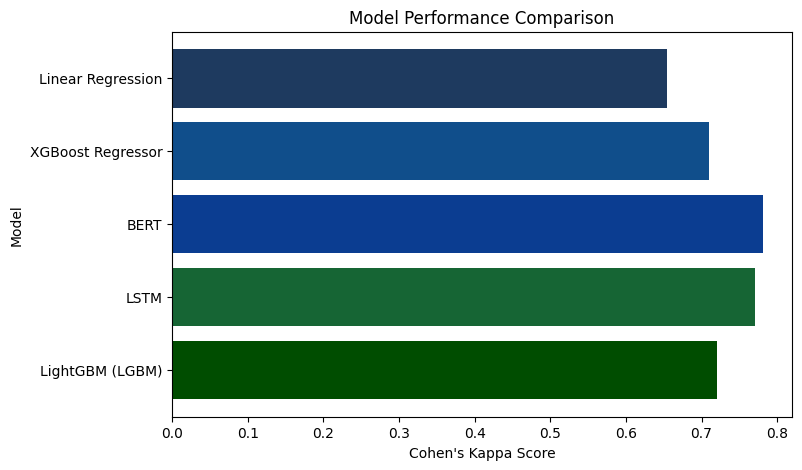

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    "Index": [1, 2, 3, 4, 5],
    "Model": ["Linear Regression","XGBoost Regressor",
              "BERT", "LSTM", "LightGBM (LGBM)"],
    "Cohen's Kappa": [0.654, 0.710,0.7806, 0.771, 0.721]
}

# Create DataFrame
df = pd.DataFrame(data)

# Print table
print(df.to_string(index=False))

# Define colors (Red for NN and BERT)
colors = ["#1E3A5F", "#104E8B", "#0B3D91", "#166534", "#004D00", "#002400"]
# Light blue, sky blue, steel blue, light green, lime green, green

# Plot the results
plt.figure(figsize=(8, 5))
plt.barh(df["Model"], df["Cohen's Kappa"], color=colors)
plt.xlabel("Cohen's Kappa Score")
plt.ylabel("Model")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show the plot
plt.show()
